In [99]:
#%pip install matplotlib
#%pip install seaborn

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data
Reading the Titanic data file Pandas DataFrame called data.

In [101]:
file_path = './Data/data.csv'
data = pd.read_csv(file_path)

## Reviewing Data
Visualization and exploration of the data.

In [102]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [104]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning and Preprocessing
 
1- Counting missing values per column  
2- Handling the missing values with imputation  
3- Encoding categorical variables 

In [105]:
# Shape of training data (num_rows, num_columns)
print(data.shape)

# Number of missing values in each column of training data
missing_val = (data.isnull().sum())
print(missing_val[missing_val > 0])

(891, 12)
Age         177
Cabin       687
Embarked      2
dtype: int64


In [106]:
df = pd.DataFrame(data)

# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [107]:
# Imputer for numerical data
num_imputer = SimpleImputer(strategy='median')
# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

     PassengerId  Survived  Pclass  \
0            1.0       0.0     3.0   
1            2.0       1.0     1.0   
2            3.0       1.0     3.0   
3            4.0       1.0     1.0   
4            5.0       0.0     3.0   
..           ...       ...     ...   
886        887.0       0.0     2.0   
887        888.0       1.0     1.0   
888        889.0       0.0     3.0   
889        890.0       1.0     1.0   
890        891.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                               Heikkinen, Miss. Laina  female  26.0    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen, Mr. William Henry    male  35.0    0.0   
..                                                 ...     ...   ... 

In [108]:
# Extract status from 'Name'
df['Status'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Drop 'Name', 'Cabin' and 'Ticket' columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Encoding 'Sex', 'Embarked', 'Title', and 'Cabin' using one-hot encoding
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_features = pd.DataFrame(ohe.fit_transform(df[['Sex', 'Embarked', 'Status']]))
encoded_features.columns = ohe.get_feature_names_out(['Sex', 'Embarked', 'Status'])

# Drop original columns to avoid duplication
df = df.drop(['Sex', 'Embarked', 'Status'], axis=1)

# Concatenate encoded features back to the original DataFrame
df = pd.concat([df, encoded_features], axis=1)

df.head()

C:\Users\hchai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Status_Major,Status_Master,Status_Miss,Status_Mlle,Status_Mme,Status_Mr,Status_Mrs,Status_Ms,Status_Rev,Status_Sir
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

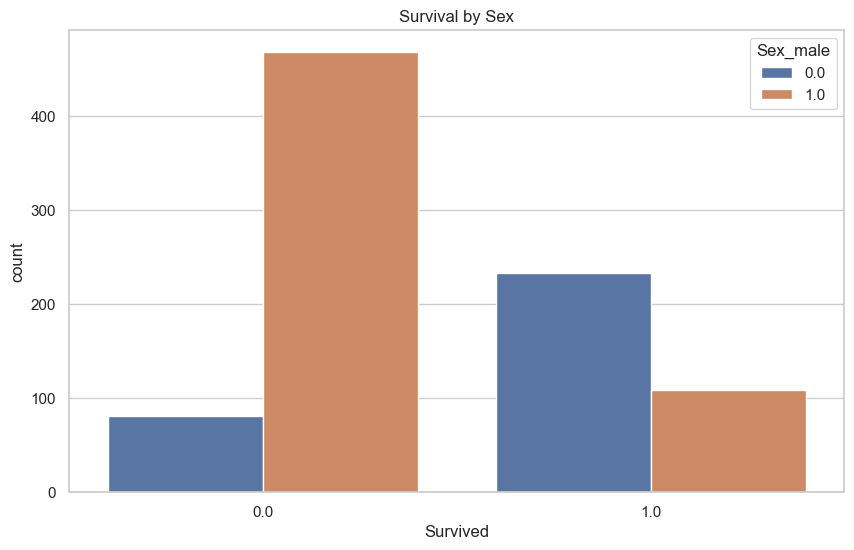

In [109]:
# Set visual style
sns.set(style="whitegrid")

# Survival by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title('Survival by Sex')
plt.show()

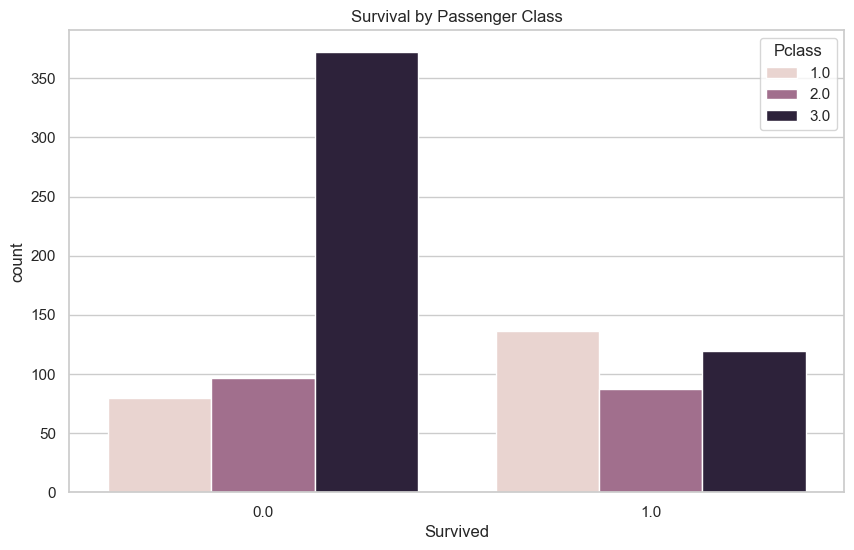

In [110]:
# Survival by Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

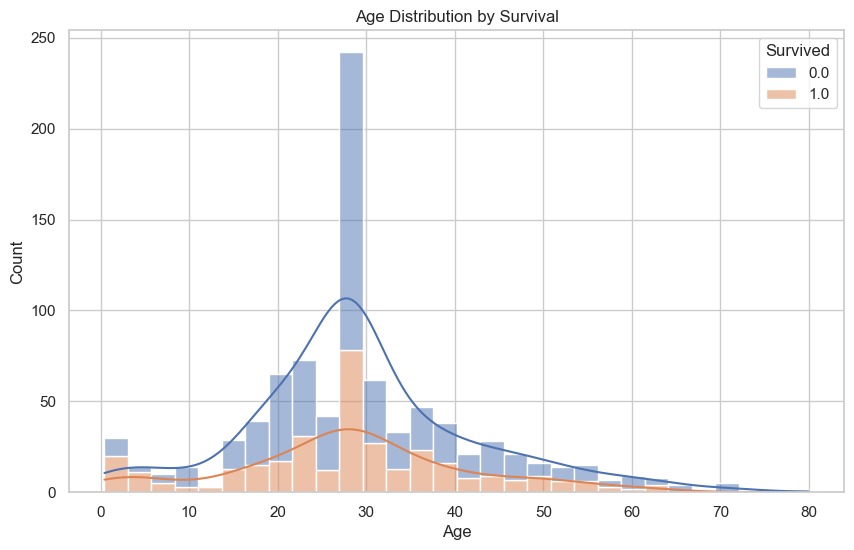

In [111]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

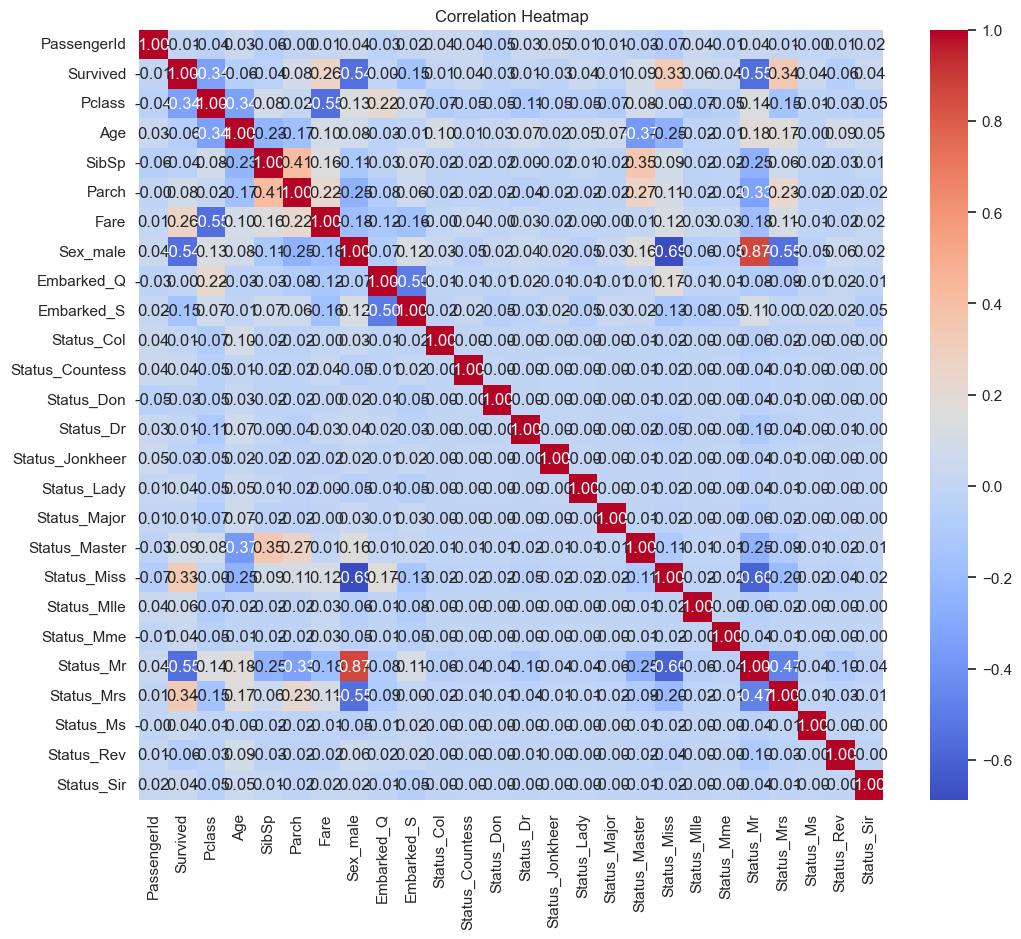

In [112]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Training the model

In [113]:
# Define features and target
X = df.drop('Survived', axis=1)  # assuming 'Survived' is the target and all other necessary preprocessing has been done
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Testing the model

In [114]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85
